Importing pandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Loading the clean Student Performance DataFile

In [2]:
df=pd.read_csv('cleaned_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'gender', 'race/ethnicity',
       'parental level of education', 'lunch', 'test preparation course',
       'math score', 'reading score', 'writing score', 'gender_map',
       'race/ethinicity_map', 'parental_level_of_education_map', 'lunch_map',
       'test_preparation_course_map', 'Result', 'math_performance',
       'reading_performance', 'writing_performance', 'total', 'percentage',
       'grades', 'Result_map', 'grades_map'],
      dtype='object')

# Predicting Grades

In [4]:
x = df[['math score','reading score','writing score','gender_map','race/ethinicity_map','parental_level_of_education_map','test_preparation_course_map','lunch_map','Result_map', 'grades_map']]

# Identifying and handling Outliers with Z-score

In [5]:
# With Z-Score
from scipy import stats
z = np.abs(stats.zscore(x))
print(z)

[[0.39002351 0.19399858 0.39149181 ... 0.74188112 0.23182058 0.26095126]
 [0.19207553 1.42747598 1.31326868 ... 0.74188112 0.23182058 1.23103031]
 [1.57771141 1.77010859 1.64247471 ... 0.74188112 0.23182058 1.23103031]
 ...
 [0.46775108 0.12547206 0.20107904 ... 1.34792485 0.23182058 0.26095126]
 [0.12609287 0.60515772 0.58901542 ... 0.74188112 0.23182058 0.26095126]
 [0.71993682 1.15336989 1.18158627 ... 1.34792485 0.23182058 1.23103031]]


In [6]:
print(np.where(z > 3))

(array([  7,   9,  17,  17,  33,  55,  59,  59,  59,  59,  61,  66,  69,
        75,  76,  76,  84,  91, 131, 145, 211, 217, 284, 327, 327, 327,
       331, 338, 339, 363, 383, 384, 424, 455, 466, 527, 528, 555, 596,
       596, 596, 601, 616, 620, 683, 706, 729, 741, 777, 785, 787, 787,
       810, 840, 842, 862, 895, 896, 902, 921, 980, 980, 980]), array([8, 8, 0, 8, 8, 8, 0, 1, 2, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 8, 8,
       8, 1, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 2, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 1, 8]))


In [7]:
df_outliers = x[(z < 3).all(axis=1)]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

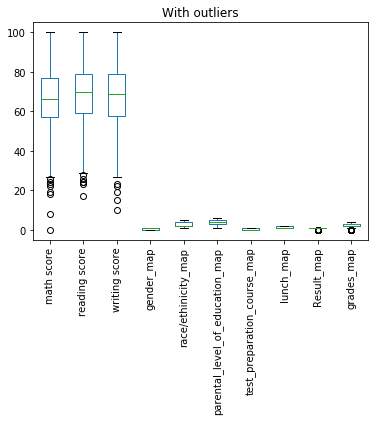

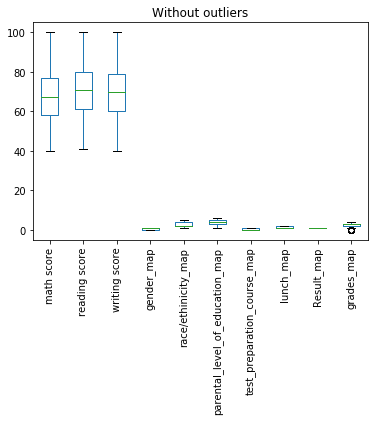

In [8]:
plt.figure(1)
x.plot.box()
plt.title("With outliers")
plt.xticks(rotation=90)
plt.figure(1)
df_outliers.plot.box()
plt.title("Without outliers")
plt.xticks(rotation=90)

# Training and testing after handling outliers

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
df_outliers_cleared = df_outliers[['math score','reading score','writing score','gender_map','race/ethinicity_map','parental_level_of_education_map','test_preparation_course_map','lunch_map','Result_map']]
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(df_outliers_cleared)
y = df_outliers['grades_map']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=40)

# Using Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(df_outliers_cleared, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
clf.score(X_train,y_train)

0.18969555035128804

In [13]:
clf.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

# checking the important features

In [14]:
feature=['gender_map',
       'race/ethinicity_map', 'parental_level_of_education_map', 'lunch_map',
       'test_preparation_course_map','math score','reading score','writing score','Result_map' ]

In [15]:
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,gender_map,0.202227
1,race/ethinicity_map,0.389418
2,parental_level_of_education_map,0.372867
3,lunch_map,0.003027
4,test_preparation_course_map,0.006378
5,math score,0.001157
6,reading score,0.010714
7,writing score,0.014213
8,Result_map,0.000000


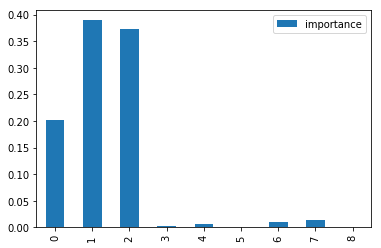

In [16]:
feature_imp.plot.bar()

# Removing less imp features from the feature

In [17]:
df_new = df_outliers_cleared.drop(['lunch_map','math score','Result_map'], axis=1)

# Training and Testing after removing less imp features

In [18]:
robust_scaler2 = RobustScaler()
X = robust_scaler2.fit_transform(df_new)
y = df_outliers['grades_map']
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2,random_state=100)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(n_jobs=-1, random_state=10)

In [20]:
logistic_regression.fit(X_train2,y_train2)

/home/subash/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/subash/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/subash/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=10, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
prediction = logistic_regression.predict(X_test2)

In [22]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix,accuracy_score, f1_score

In [23]:
print ('Accuracy:', accuracy_score(y_test2,prediction ))


Accuracy: 0.8210526315789474


In [24]:
print ('F1 score:', f1_score(y_test2, prediction,average='micro'))


F1 score: 0.8210526315789475


In [25]:
print ('Precision:', precision_score(y_test2, prediction,average='micro'))



Precision: 0.8210526315789474


In [26]:
print ('Recall:', recall_score(y_test2, prediction,average='micro'))

Recall: 0.8210526315789474


In [27]:
print ('\n confussion matrix:\n',confusion_matrix(y_test2, prediction))


 confussion matrix:
 [[ 0  0  0  1  0]
 [ 0  0  9  1  0]
 [ 0  0 15 19  0]
 [ 0  0  0 95  2]
 [ 0  0  0  2 46]]


# Classification Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=10,random_state=10)
class_tree.fit(X_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [29]:
prediction = class_tree.predict(X_test2)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
print ('Accuracy:', accuracy_score(y_test2,prediction ))

Accuracy: 0.9052631578947369


In [32]:
print ('\n confussion matrix:\n',confusion_matrix(y_test2, prediction))


 confussion matrix:
 [[ 0  0  0  1  0]
 [ 0  7  3  0  0]
 [ 0  3 30  1  0]
 [ 0  0  3 90  4]
 [ 0  0  0  3 45]]


# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
model.score(X_train2,y_train2)

0.7915845447258673

In [37]:
model.score(X_test2,y_test2)

0.8053807529770727

In [38]:
prediction=model.predict(X_test2)
prediction

array([3.64150843, 3.95991131, 1.47311666, 4.50578764, 3.30383325,
       2.20225081, 2.57772601, 2.20323822, 2.00870505, 2.53559853,
       1.99011607, 2.81272306, 2.54013483, 3.3549699 , 3.11959131,
       4.02136454, 3.16380119, 3.11597075, 3.99977438, 2.56479188,
       3.33964202, 2.79914716, 3.42867394, 4.40368853, 4.03162587,
       2.7376091 , 1.78612164, 4.41752345, 3.8196005 , 4.52041756,
       2.73817168, 3.02850168, 2.85453232, 3.79332468, 3.7317325 ,
       2.91888458, 1.47817072, 3.50380023, 2.83057323, 3.96315418,
       3.00918306, 3.2804636 , 2.94577436, 4.46867832, 1.80635599,
       3.66970204, 2.941677  , 2.67961955, 3.09333906, 3.69873465,
       3.10313789, 3.11778014, 2.32631471, 3.13212239, 2.73044484,
       1.90033207, 3.95796184, 2.78045989, 1.99791459, 2.74002286,
       3.86723346, 2.49100383, 3.12497786, 2.13034383, 3.24507227,
       2.06945318, 2.63693128, 2.3905901 , 1.78221669, 2.378235  ,
       2.59039425, 4.52092818, 1.46252462, 3.42228862, 2.65005

Text(0, 0.5, 'Predictions')

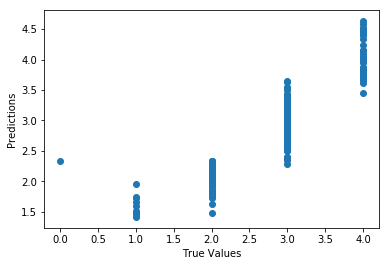

In [39]:
plt.scatter(y_test2, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")

# KNN

In [40]:
# Training data
x3 = df[['gender_map',
       'race/ethinicity_map', 'parental_level_of_education_map',
       'test_preparation_course_map','reading score','writing score']]
# target values 
y3 = df['grades_map']

X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.20, random_state=40)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train3, y_train3) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
neigh.score(X_test3,y_test3)

0.765

In [43]:
predict = neigh.predict(X_test3)
predict


array([1, 3, 4, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 2, 3, 2, 3, 4,
       3, 3, 2, 2, 2, 4, 3, 3, 2, 4, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 4, 4, 3, 1, 2, 2, 3, 0, 3, 2, 3, 1, 4, 4, 3, 2,
       3, 3, 3, 0, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 2, 0, 3, 3, 3, 4, 1, 3,
       4, 1, 2, 4, 2, 3, 0, 3, 3, 4, 3, 4, 3, 4, 3, 3, 2, 3, 3, 3, 3, 4,
       3, 0, 2, 3, 3, 3, 3, 3, 4, 0, 3, 2, 3, 4, 2, 3, 0, 4, 2, 2, 4, 4,
       3, 3, 3, 3, 3, 2, 0, 3, 3, 1, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3, 3,
       1, 4, 4, 3, 3, 3, 4, 3, 4, 3, 0, 3, 3, 3, 4, 3, 2, 4, 2, 4, 2, 2,
       3, 3, 2, 4, 4, 4, 3, 1, 2, 2, 4, 3, 0, 1, 3, 3, 4, 3, 3, 3, 4, 3,
       2, 1])

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test3, predict)
accuracy

0.765

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test3,predict))

              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           1       0.55      0.50      0.52        12
           2       0.71      0.79      0.75        34
           3       0.82      0.86      0.84        98
           4       0.79      0.70      0.75        44

   micro avg       0.77      0.77      0.77       200
   macro avg       0.67      0.65      0.66       200
weighted avg       0.76      0.77      0.76       200



# Support Vector Classification

In [46]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train3, y_train3)
print("SVC Model Score" , ":" , s.score(X_train3, y_train3) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test3, y_test3))

SVC Model Score : 0.955 , Cross Validation Score : 0.765


/home/subash/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
